# Rock Paper Scissors using ConvNets

### By: Soorya Parthiban

## Importing the libraries

In [2]:
import numpy as np 
import pandas as pd
import os
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Defining Image Data Generators

In [3]:
TRAINING_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/train"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                        target_size=(150,150),
                                                        class_mode='categorical',
                                                        batch_size=126)

VALIDATION_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(150,150),
                                                              class_mode='categorical',
                                                              batch_size=126)

TEST_DIR = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/test"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                 target_size=(150,150),
                                                 class_mode="categorical",
                                                 batch_size=126)


Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 372 images belonging to 3 classes.


## Building the CNN Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

cnn = Sequential()
cnn.add(Conv2D(filters=64,activation="relu",kernel_size=3,input_shape=(150,150,3)))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=64, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=128, activation="relu",kernel_size=3))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dropout(0.2))
cnn.add(Dense(units=512, activation="relu"))
cnn.add(Dense(units=3,activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [36]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])
callback=EarlyStopping(monitor="val_loss")
history=cnn.fit(train_generator,validation_data=test_generator,epochs=20,
        callbacks=[callback])

Epoch 1/20
20/20 [==============================] - 28s 1s/step - loss: 0.1371 - accuracy: 0.9579 - val_loss: 0.0899 - val_accuracy: 0.9624
Epoch 2/20
20/20 [==============================] - 24s 1s/step - loss: 0.0758 - accuracy: 0.9751 - val_loss: 0.4241 - val_accuracy: 0.8468


In [37]:
pd.DataFrame(cnn.history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.088588,0.969841,0.089885,0.962366
1,0.074977,0.974603,0.424082,0.846774


<AxesSubplot:>

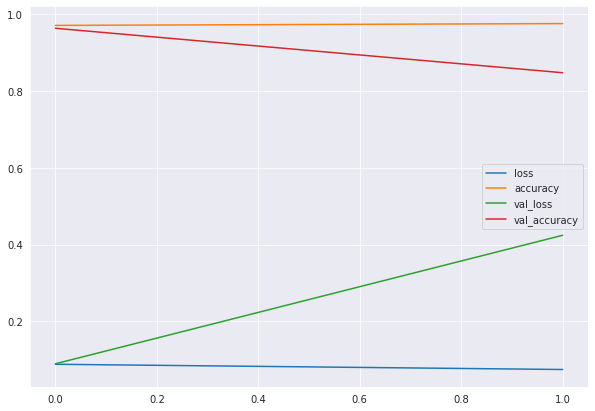

In [38]:
sns.set_style("darkgrid")
pd.DataFrame(cnn.history.history).plot(figsize=(10,7))

## Saving the CNN Model

In [39]:
cnn.save("CNN-RPS.h5")

## Creating a function to classify images

In [40]:
def predictor(location):
    test_image=image.load_img(location,target_size=(150,150))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    if result[0][0] == 1:
        prediction = "It is a paper"
    elif result[0][1] == 1:
        prediction = "It is a rock"
    else:
        prediction ="It is a scissors"
        
    return prediction

### Testing the function

In [41]:
print(predictor("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/rock-hires1.png"))

It is a rock


In [25]:
predictor("../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/scissors-hires1.png")

'It is a scissors'

In [42]:
import os
images = os.listdir(VALIDATION_DIR) 

print(images)

['paper8.png', 'paper1.png', 'rock4.png', 'scissors3.png', 'rock2.png', 'paper3.png', 'paper7.png', 'scissors5.png', 'scissors7.png', 'rock9.png', 'scissors8.png', 'paper2.png', 'scissors6.png', 'paper9.png', 'scissors-hires1.png', 'scissors-hires2.png', 'rock5.png', 'paper-hires1.png', 'scissors4.png', 'rock8.png', 'rock6.png', 'scissors9.png', 'paper4.png', 'rock-hires1.png', 'scissors2.png', 'scissors1.png', 'rock-hires2.png', 'rock3.png', 'paper5.png', 'rock7.png', 'paper-hires2.png', 'rock1.png', 'paper6.png']


In [43]:
predictions= list()
for i in images:
    location = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/"+i
    prediction=predictor(location)
    predictions.append(prediction)    

In [44]:
predictions_df= pd.DataFrame(predictions)
images_df = pd.DataFrame(images)

In [45]:
new_df= pd.concat([predictions_df,images_df],axis=1)
new_df.columns=["Predictions of CNN","Actual Values"]

print(new_df) 

   Predictions of CNN        Actual Values
0       It is a paper           paper8.png
1       It is a paper           paper1.png
2        It is a rock            rock4.png
3    It is a scissors        scissors3.png
4        It is a rock            rock2.png
5       It is a paper           paper3.png
6       It is a paper           paper7.png
7    It is a scissors        scissors5.png
8    It is a scissors        scissors7.png
9        It is a rock            rock9.png
10   It is a scissors        scissors8.png
11      It is a paper           paper2.png
12   It is a scissors        scissors6.png
13       It is a rock           paper9.png
14   It is a scissors  scissors-hires1.png
15   It is a scissors  scissors-hires2.png
16       It is a rock            rock5.png
17      It is a paper     paper-hires1.png
18   It is a scissors        scissors4.png
19       It is a rock            rock8.png
20       It is a rock            rock6.png
21   It is a scissors        scissors9.png
22      It 

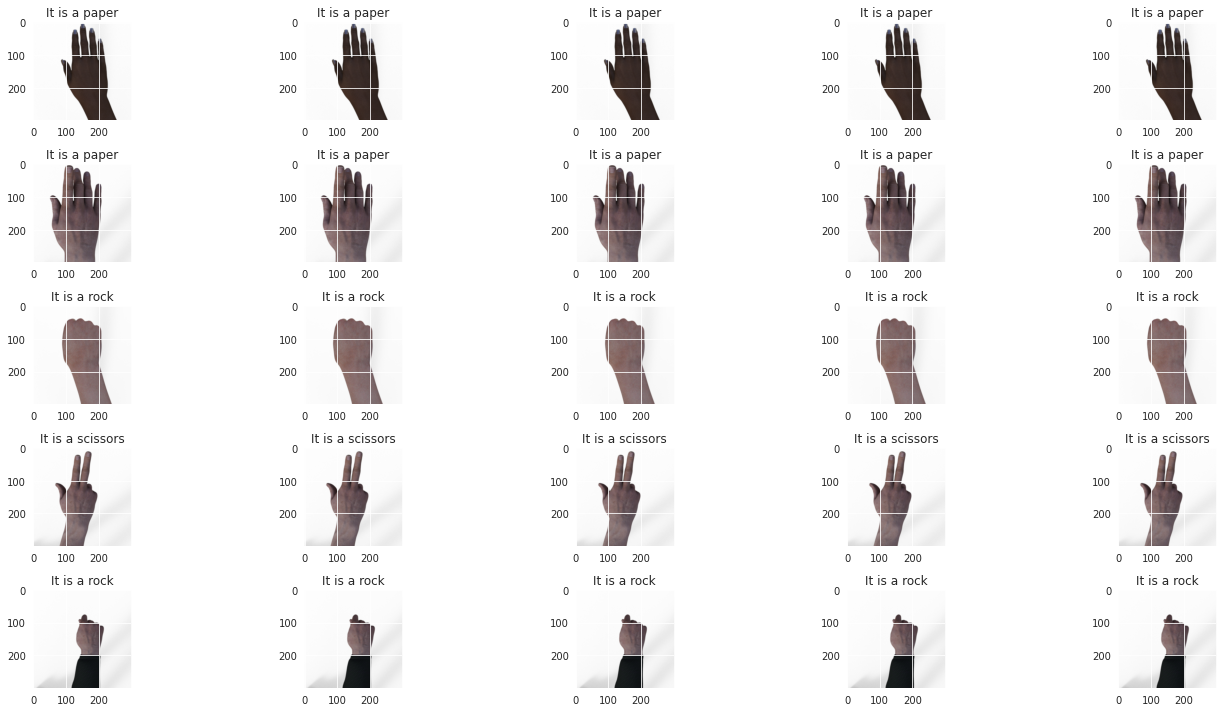

In [46]:
# Plotting the Images

fig, axs = plt.subplots(5, 5, figsize=(20, 10))
count = 0
for i in images[:5]:
  # get the list of images in the particular class
    location = "../input/rock-paper-scissors-dataset/Rock-Paper-Scissors/validation/"+i
  # plot 5 images per class
    img = Image.open(location)
    for j in range(5):
        axs[count][j].title.set_text(predictor(location))
        axs[count][j].imshow(img)  
        j+=1

    count += 1
fig.tight_layout()


# THE END